# Data Understanding
For each subsection will b specified:
 - the related issue: e.g. (`#3`)
 - the assignee (`djanloo`, `tommy`)

| Task | Issue | Assignee |
| ----:| -----:| --------:|
| **semantics**   | `#4`| `djanloo` |
| **distribution** | `#4`| `djanloo` |
| **quality**    | `#5`| `tommy`  |
| **transformations**    | `#5`| `tommy`  |
| **correlations**    | `#4`| `djanloo`  |

In [166]:
# Imports and preliminary stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl

# Sets default font
mpl.rcParams['font.size'] = 8.0
mpl.rcParams['font.family'] = "serif"

In [167]:
df = pd.read_csv("ravdess_features.csv")
already_transformed = False #This  will be useful later
# Set to display all fields
pd.set_option('display.max_rows', 10, 'display.max_columns', None)
display(df.head())

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,channels,sample_width,frame_rate,frame_width,length_ms,frame_count,intensity,zero_crossings_sum,mfcc_mean,mfcc_std,mfcc_min,mfcc_max,sc_mean,sc_std,sc_min,sc_max,sc_kur,sc_skew,stft_mean,stft_std,stft_min,stft_max,stft_kur,stft_skew,mean,std,min,max,kur,skew
0,audio-only,speech,fearful,normal,Dogs are sitting by the door,2nd,2.0,F,1,2,48000,2,3737,179379.0,-36.793432,16995,-33.485947,134.654860,-755.22345,171.69092,5792.550744,3328.055457,0.0,13541.959028,-1.120769,0.250940,0.415250,0.335533,0.0,1.0,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,audio-only,speech,angry,normal,Dogs are sitting by the door,1st,16.0,F,1,2,48000,2,3904,187387.0,NaN,13906,-29.502108,130.485630,-713.98560,205.00770,5197.620555,4040.931570,0.0,12000.290443,-1.531204,0.219582,0.417488,0.352380,0.0,1.0,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
2,audio-only,NaN,happy,strong,Dogs are sitting by the door,2nd,16.0,F,1,2,48000,2,4671,224224.0,-32.290737,18723,-30.532463,126.577110,-726.06036,165.45653,4830.743037,3332.131300,0.0,12007.751173,-1.130153,0.436699,0.379758,0.352270,0.0,1.0,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659
3,audio-only,NaN,surprised,normal,Kids are talking by the door,1st,14.0,F,1,2,48000,2,3637,174575.0,-49.019839,11617,-36.059555,159.725160,-842.94635,190.03609,5376.446478,4053.663073,0.0,12048.223893,-1.497765,0.098802,0.407277,0.360552,0.0,1.0,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014
4,audio-only,song,happy,strong,Dogs are sitting by the door,2nd,2.0,F,1,2,48000,2,4404,211411.0,-31.214503,15137,-31.405996,122.125824,-700.70276,161.13400,5146.012474,3442.724109,0.0,12025.582707,-1.167544,0.496066,0.415974,0.350655,0.0,1.0,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872


### Semantics

See report for variables meaning.

#### Data types

|feature | type |
|--------|------|
|modality|?|
|vocal_channel | binary |
|emotion | categorical |
|emo_intens | binary|
|statement|binary|
|repetition|binary|
|actor|categorical (marginally ordinal)|
|sex|binary|
|**others**| quantitative |


Since `modality` is categorical with only one value we drop it now.

In [168]:
# Categorical/quantitative split
df.drop(columns=["modality"], inplace=True)
categorical_features = ["vocal_channel", "emotion","emotional_intensity", 
                        "statement", "repetition", "actor", "sex"]
quantitative_features = [feat for feat in df.columns if not feat in categorical_features]

In [169]:
stats = df.describe()
display(stats)

print(f"Dataset has {len(df.columns)} features")

# Print fields with missing values
print("Missing values:")
for field in stats.columns:
    missing_ratio = 1 - stats[field]["count"] / len(df) 
    if missing_ratio > 0.0:
        print(f"Field {field:>10}: {missing_ratio*100:.1f}%  of missing ")
print()
# Check for field that have only one value
print("Features that have only one value:")
for field in stats.columns:
    if stats[field]["min"] == stats[field]["max"]:
        print(f"- {field}")


,actor,channels,sample_width,frame_rate,frame_width,length_ms,frame_count,intensity,zero_crossings_sum,mfcc_mean,mfcc_std,mfcc_min,mfcc_max,sc_mean,sc_std,sc_min,sc_max,sc_kur,sc_skew,stft_mean,stft_std,stft_min,stft_max,stft_kur,stft_skew,mean,std,min,max,kur,skew
count,1326.000000,2452.000000,2452.0,2452.0,2452.000000,2452.000000,2452.000000,1636.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.0,2452.000000,2452.000000,2.452000e+03,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000
mean,12.582202,1.002447,2.0,48000.0,2.004894,4092.151305,193587.188010,-37.625332,12885.314029,-28.769180,136.777233,-758.909381,199.182514,5170.101398,3365.453393,551.834124,11830.461864,-1.142642,0.348442,0.475846,0.331371,0.002272,1.0,-1.247929,0.112889,1.393649e-08,0.020504,-0.164871,0.179839,11.203002,-0.048245
std,6.916240,0.049416,0.0,0.0,0.098833,598.321526,36825.369056,8.451982,3665.319584,4.461886,20.451689,99.945452,26.002107,875.185444,580.479034,508.025890,1004.955976,0.572654,0.353005,0.082551,0.023773,0.004830,0.0,0.211781,0.330759,4.267587e-05,0.021024,0.175443,0.195539,6.614859,0.454925
min,1.000000,1.000000,2.0,48000.0,2.000000,2936.000000,-1.000000,-63.864613,4721.000000,-43.812923,83.621370,-1085.479700,126.250810,2360.880942,1491.341071,0.000000,7657.495158,-1.795576,-0.510390,0.214089,0.210126,0.000000,1.0,-1.669603,-0.993957,-9.435575e-04,0.000652,-0.998810,0.004669,1.757794,-2.356526
25%,7.000000,1.000000,2.0,48000.0,2.000000,3604.000000,172972.000000,-43.539869,10362.500000,-31.828597,122.623928,-826.464075,180.081417,4563.684781,3025.431971,0.000000,11516.034429,-1.496187,0.098549,0.415260,0.317780,0.000000,1.0,-1.390612,-0.094334,-1.394488e-06,0.006791,-0.202431,0.055489,6.519988,-0.336624
50%,13.000000,1.000000,2.0,48000.0,2.000000,4004.000000,190591.000000,-37.072745,12383.500000,-28.681109,136.523810,-760.983065,201.697175,5122.712259,3433.835368,707.319256,12000.292653,-1.308938,0.347621,0.475740,0.334224,0.000190,1.0,-1.292105,0.126065,-9.810701e-08,0.013880,-0.103775,0.109726,9.828686,0.004256
75%,19.000000,1.000000,2.0,48000.0,2.000000,4538.000000,217817.000000,-31.591309,14966.000000,-25.550238,151.385135,-692.890015,218.185288,5775.959809,3768.503344,977.693852,12091.886054,-0.982944,0.557427,0.530571,0.349272,0.001999,1.0,-1.152519,0.335574,8.363511e-07,0.026154,-0.054352,0.224487,14.085435,0.262978
max,24.000000,2.000000,2.0,48000.0,4.000000,6373.000000,305906.000000,-16.353953,30153.000000,-15.491450,195.942920,-461.489320,280.173700,7655.335726,4819.783069,2121.417965,17477.540047,3.657953,1.825436,0.724077,0.391928,0.039378,1.0,0.794669,1.465815,1.222810e-03,0.152168,-0.006134,0.999146,59.085695,1.799676


Dataset has 37 features
Missing values:
Field      actor: 45.9%  of missing 
Field  intensity: 33.3%  of missing 

Features that have only one value:
- sample_width
- frame_rate
- stft_max


From this we can conclude that:
- `sample_width`
- `frame_rate`
- `stft_max`

are **useless** features, since they are equal for everyone.

Furthermore, `actor` field has almost 50% of missing values, so it is higly probable that it will be useless too.

In [170]:
# Remove useless features
print(quantitative_features)
useless_features = ["sample_width", "frame_rate", "stft_max"]
try:
    df.drop(columns=useless_features, inplace=True)
except KeyError:
    pass
quantitative_features = list(set(quantitative_features) - set(useless_features))
quantitative_features.sort()
print(quantitative_features)

['channels', 'sample_width', 'frame_rate', 'frame_width', 'length_ms', 'frame_count', 'intensity', 'zero_crossings_sum', 'mfcc_mean', 'mfcc_std', 'mfcc_min', 'mfcc_max', 'sc_mean', 'sc_std', 'sc_min', 'sc_max', 'sc_kur', 'sc_skew', 'stft_mean', 'stft_std', 'stft_min', 'stft_max', 'stft_kur', 'stft_skew', 'mean', 'std', 'min', 'max', 'kur', 'skew']
['channels', 'frame_count', 'frame_width', 'intensity', 'kur', 'length_ms', 'max', 'mean', 'mfcc_max', 'mfcc_mean', 'mfcc_min', 'mfcc_std', 'min', 'sc_kur', 'sc_max', 'sc_mean', 'sc_min', 'sc_skew', 'sc_std', 'skew', 'std', 'stft_kur', 'stft_mean', 'stft_min', 'stft_skew', 'stft_std', 'zero_crossings_sum']


### Distribution

##### Quantitative features

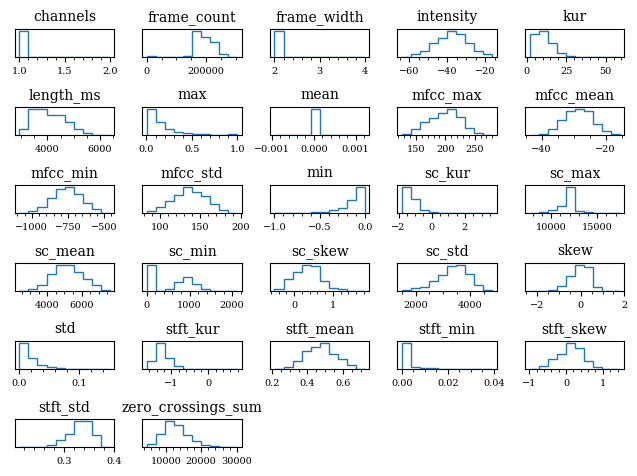

In [171]:
fig, axes = plt.subplots(6,5)

# Single histogram information template
shit = {"histtype":"step"}
for cat, ax in zip(quantitative_features, axes.flatten()):
    ax.hist(df[cat], **shit)
    ax.set_yticks([])
    ax.tick_params(axis='both', which='major', labelsize=7)
    ax.set_title(cat, font={"size":10})

for ax in axes.flatten()[len(quantitative_features):]:
     ax.axis("off")

At first glance some features are distributed in a "uneven" way, such as:

- kur
- max
- min
- sc_kur
- stft_kur
- std
- **mean** 
- **sc_min**
- **stft_min**


the last three appear to be somewhat patological since:
- log(std) is proportional to intensity (redundancy)
- mean is not distributed
- sc_min, stft_min are "bimodal"


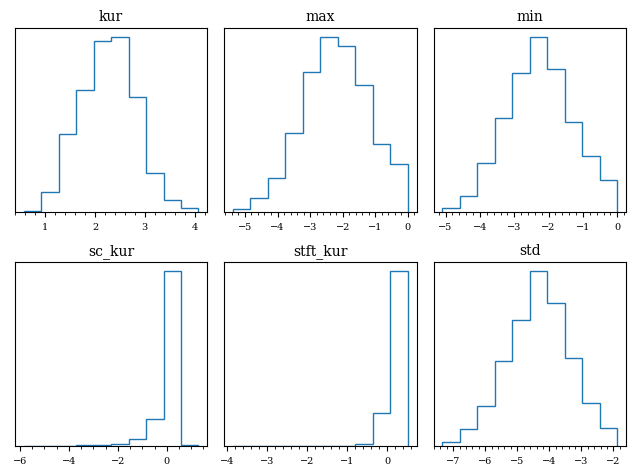

In [172]:
fig, axes = plt.subplots(2,3)
log_scalable_features = ["kur", "max", "min", "sc_kur", "stft_kur", "std"]
# Single histogram information template
shit = {"histtype":"step"}
for cat, ax in zip(log_scalable_features, axes.flatten()):
    ax.hist(np.log(np.abs(df[cat]) + 1e-10), **shit)
    ax.set_yticks([])
    ax.tick_params(axis='both', which='major', labelsize=7)
    ax.set_title(cat, font={"size":10})

for ax in axes.flatten()[len(log_scalable_features):]:
     ax.axis("off")

Since these features span many orders of magnitude, a `log_scale` is suggested for transformation

For the "patological" ones:

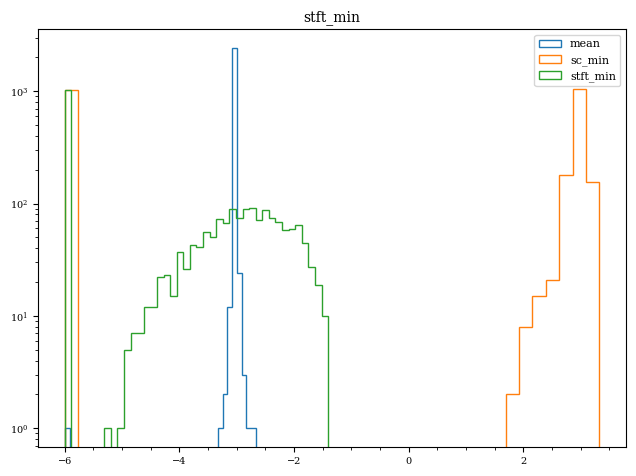

In [173]:
fig, ax = plt.subplots(1)
features = ["mean", "sc_min", "stft_min"]
# Single histogram information template
shit = {"histtype":"step", "bins":40}
for cat in features:
    ax.hist(np.log10(df[cat] - np.min(df[cat]) + 1e-6), **shit, label=cat)
    ax.set_yticks([])
    ax.tick_params(axis='both', which='major', labelsize=7)
    ax.set_title(cat, font={"size":10})
    ax.set_yscale("log")

for ax in axes.flatten()[len(features):]:
     ax.axis("off")
plt.legend()

This means that:
- mean feature is better-behaved if log-scaled, after being transported to non-negative values
- sc_min and stft_min has to be deeper investigated

##### Categorical features

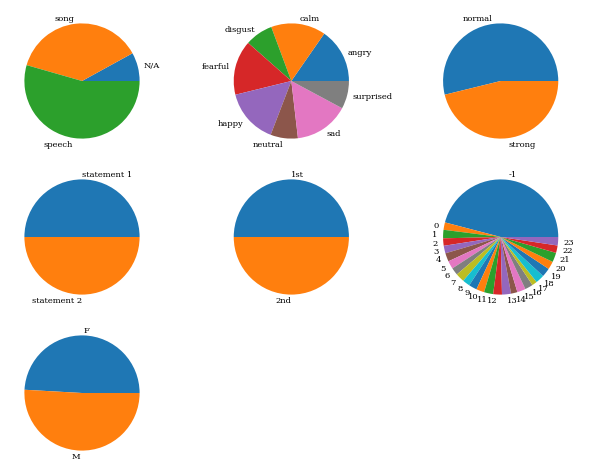

In [174]:
fig, axes = plt.subplots(3,3)
df_clean_labels = df.copy()
df_clean_labels.actor = pd.Categorical(df_clean_labels.actor).codes
df_clean_labels.vocal_channel.fillna("N/A", inplace=True)
df_clean_labels.replace({'statement': {"Dogs are sitting by the door": "statement 1", 
                                        "Kids are talking by the door": "statement 2"}}, inplace=True)
_ = [ax.axis("off") for ax in axes.flatten()]
for cat, ax in zip(categorical_features, axes.flatten()):
    df_clean_labels.groupby(cat).size().plot(kind='pie', 
                                    textprops={'fontsize': 6},
                                    # colors=['tomato', 'gold', 'skyblue'], 
                                    ax=ax)
plt.tight_layout()

#### Conditional distributions

Check whether it exists some feature that can discriminate between male and female or song/speech just with the distribution

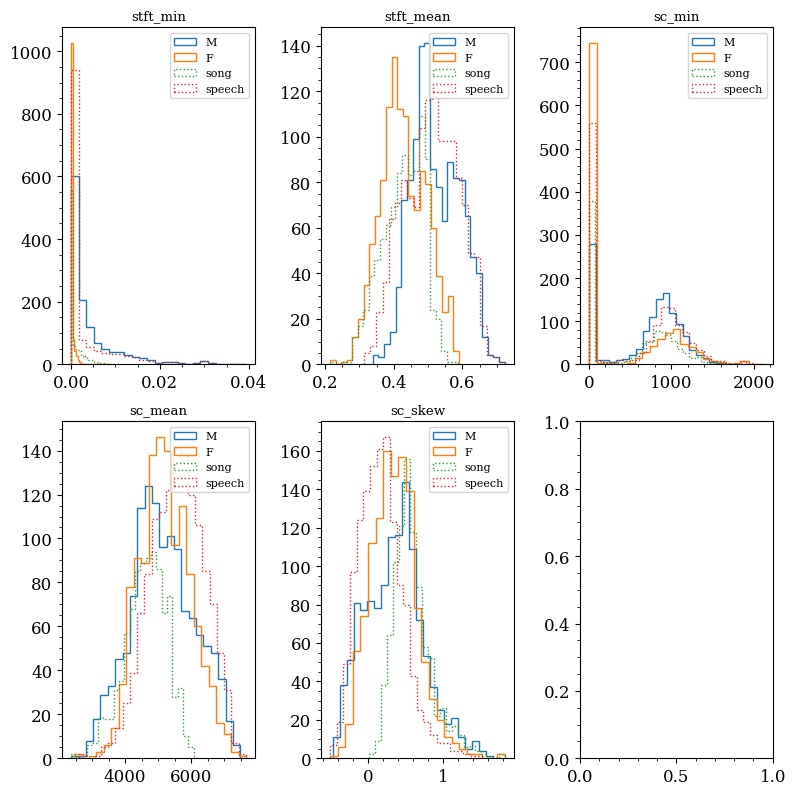

In [175]:
features = ["stft_min", "stft_mean", "sc_min", "sc_mean", "sc_skew"]
fig, axes = plt.subplots(2,3, figsize=(8,8))

axes = axes.flatten()

shit = {"histtype":"step", "bins":int(3*np.log(len(df)))}
for ax, feat in zip(axes, features):
    ax.hist(df[feat][df.sex=="M"],label="M", **shit)
    ax.hist(df[feat][df.sex=="F"],label="F", **shit)
    ax.hist(df[feat][df.vocal_channel=="song"], label="song", ls=":",**shit)
    ax.hist(df[feat][df.vocal_channel=="speech"],label = "speech", ls=":", **shit)
    ax.set_title(feat)
    ax.legend()



It can be seen that `stft_min` mildly discriminate between males and females, while `sc_mean` does the same on song/speech

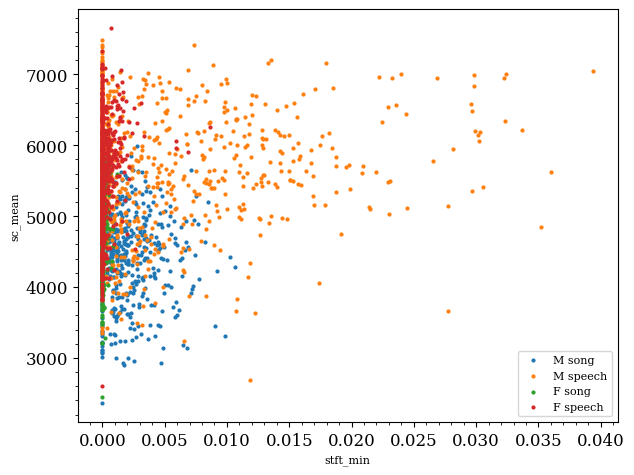

In [176]:
for sex in ["M", "F"]:
    for vc in ["song", "speech"]:
        filter = (df.sex == sex)&(df.vocal_channel == vc)
        plt.scatter(df.stft_min[filter], df.sc_mean[filter], label = f"{sex} {vc}", s=4)

plt.xlabel("stft_min")
plt.ylabel("sc_mean")

plt.legend()

### Quality

#### intensity

First of all, missing valus of `intensity` feature are replaced using the decibel conversion on `std`

In [177]:
df.intensity[df.intensity.isna()] = 20*np.log10(df["std"][df.intensity.isna()])

/tmp/ipykernel_94042/3702779853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.intensity[df.intensity.isna()] = 20*np.log10(df["std"][df.intensity.isna()])


#### Fourier tranform min zeros

It is possible to see that two features (`sc_min`, `stft_min`) are not well behaved

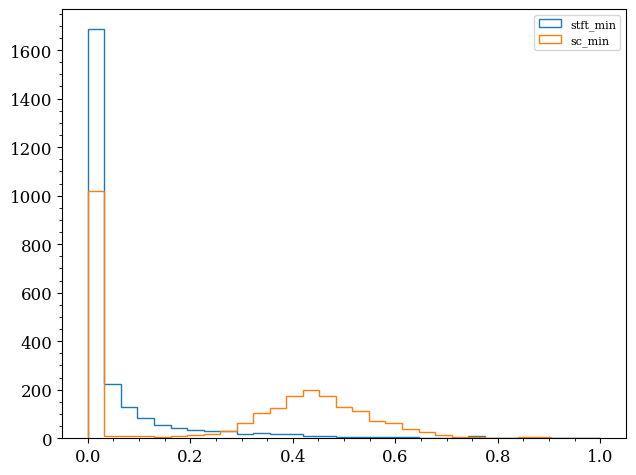

In [178]:
# single histogram information template 
shit = {"histtype":"step", "bins":int(4*np.log(len(df)))}
sc_min = df.sc_min
sc_min = (sc_min - min(sc_min))/(max(sc_min) - min(sc_min))

stft_min = df.stft_min
stft_min = (stft_min - min(stft_min))/(max(stft_min) - min(stft_min))

plt.hist( stft_min,  **shit, label="stft_min")
plt.hist(sc_min,  **shit, label="sc_min")
plt.legend()

print()

Indeed, both those values are often both equal to zero. The ratio of such samples over the total is:

In [179]:
print(((df.sc_min==0)&(df.stft_min==0)).sum()/len(df)*100)

41.6394779771615


So almost half of the dataset seem to suffer from a numerical problem: since both variables are the result of the `min` operation over the power spectrum, it is possible that some spurious zeros (maybe due to acoustic noise or sampling problem) set these features to zero.

For the sake of correlations, let's see if those patological samples are ralated to some categorical features

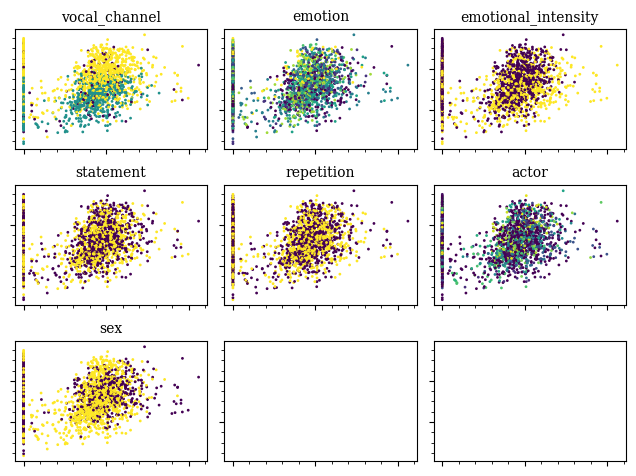

In [180]:
# Scatter plot
fig, axes = plt.subplots(3,3, sharex=True, sharey=True)
for cat, ax in zip(categorical_features, axes.flatten()):
    ax.scatter(df.sc_min, df. sc_mean, c=pd.Categorical(df[cat]).codes, s=1)
    ax.set_title(cat, font={"size":10})
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    

It doesn't seem that patological samples of `sc_min` belong to a certain category.

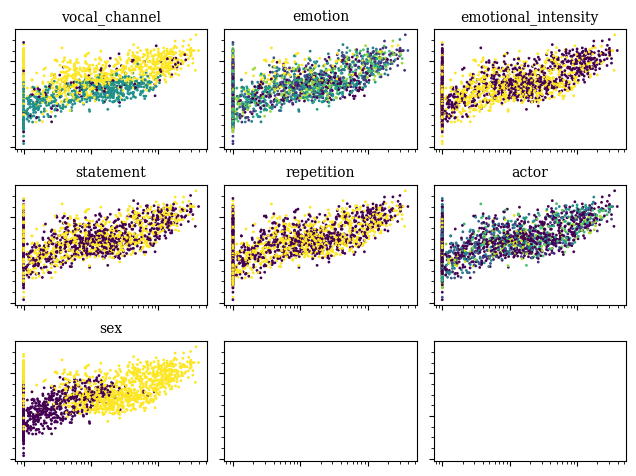

In [181]:
fig, axes = plt.subplots(3,3, sharex=True, sharey=True)
for cat, ax in zip(categorical_features, axes.flatten()):
    ax.scatter(df.stft_min+1e-4, df.stft_mean, c=pd.Categorical(df[cat]).codes, s=1)
    ax.set_xscale("log")
    ax.set_title(cat, font={"size":10})
    ax.set_xticklabels([])
    ax.set_yticklabels([])

So `stft_min` patological samples do not match any category. This means that classification can't take any information from those and a correction operation is allowed.

Let's do the pie chart of the patological features to check whether they are biased in some category

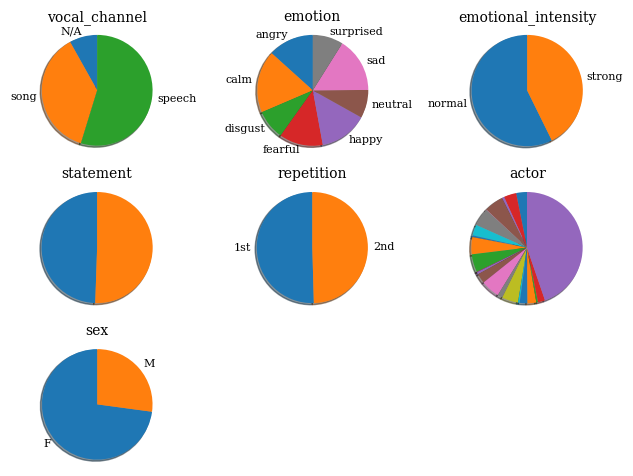

In [182]:
from sklearn.preprocessing import OneHotEncoder

## Pie chart of principal categories of wrong samples
fig, axes = plt.subplots(3,3)

for ax in axes.flatten():
    ax.axis("off")

filter = (df.sc_min == 0.0)&(df.stft_min == 0.0) 
wrong_samples = np.where(filter)

for cat, ax in  zip(categorical_features, axes.flatten()):
    new_df = pd.Categorical(df[cat].fillna(value="N/A").apply(str))

    labels = list(new_df.categories) # Unique categories
    categories = new_df[wrong_samples[0]].reshape((-1,1)) # PEr-sample category

    X = OneHotEncoder( categories=[labels]).fit_transform(new_df[wrong_samples[0]].reshape((-1,1))).toarray()

    sizes = np.mean(X, axis=0)*100

    if cat=="actor":
        labels = [str(int(float(l))) if l != "N/A" else l for l in labels]
    
    kwargs = {"shadow":True, "startangle":90}
    if cat not in ["actor", "statement"]:
        kwargs["labels"] = labels

    patches, texts  = ax.pie(sizes, **kwargs)
    for t in texts:
        t.set_fontsize(8)
    
    ax.set_title(cat, font={"size":10})
    ax.axis('equal')
plt.show()

It can be seen that every category reflects the whole-dtaset distribution, while the `sex` feature is uneven in the patological data. So it seems that correcting these values will make us loose information about sex.

### Transformations

We log-scale the features listed in the distribution section, with particular attention to `mean` since can have negative values

In [183]:
for feature in log_scalable_features:
    df[feature] -= min(df[feature])-1e-12
    df[feature] = np.log(df[feature])

In [184]:
# Check for infinite values
np.logical_not(np.isfinite(df[quantitative_features].values)).sum(axis=0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

#### Replacing values

Since zeros are spurious, maybe a possible strategy is to replace `_min` with `_mean` or a function of it

Text(0, 0.5, 'stft_mean')

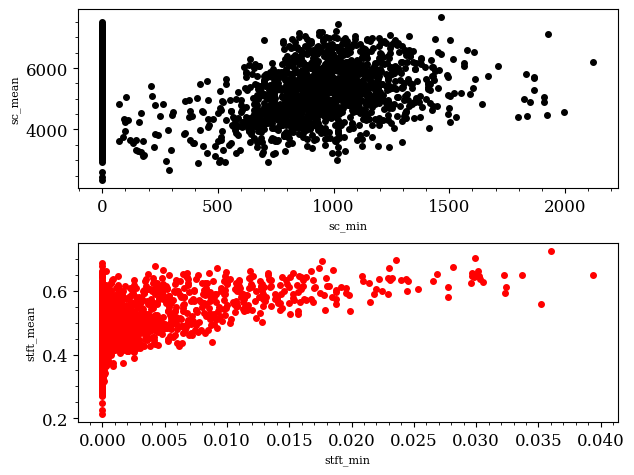

In [185]:
fig, ax = plt.subplots(2)
ax[0].scatter(df.sc_min, df.sc_mean, color='k')
ax[0].set_xlabel("sc_min")
ax[0].set_ylabel("sc_mean")

ax[1].scatter(df.stft_min, df.stft_mean, color='r')
ax[1].set_xlabel("stft_min")
ax[1].set_ylabel("stft_mean")

As it can be seen, `sc_mean` can replace `sc_min` if scaled by a factor $\approx 4$, while `stft_mean` seems to have a more complex relaton with `stft_min`.

First we try to divide `sc_min` by the approximate factor and scaling a log-transform `stft_mean`:

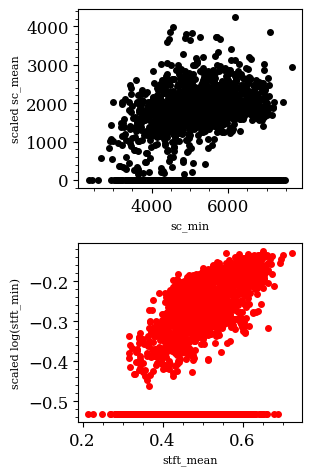

In [186]:
fig, ax = plt.subplots(2)
ax[0].scatter(df.sc_mean, 2*df.sc_min, color='k')
ax[0].set_xlabel("sc_min")
ax[0].set_ylabel("scaled sc_mean")
ax[0].set_aspect("equal")

# NOTE: adding a small number (1e-6) makes possible to compute 
# the log of the zero-valued samples
ax[1].scatter( df.stft_mean, np.log(df.stft_min+1e-6)/26, color='r')
ax[1].set_ylabel("scaled log(stft_min)")
ax[1].set_xlabel("stft_mean")
ax[1].set_aspect("equal")


Now two things are clear:
- `stft_min` (from now $\mathcal{F}_{ min}$) can be replaced by the log-transformed scaled `stft_mean` ($\langle \mathcal{F}\rangle $) value
- `sc_min` ($S_{min}$) can be replaced with a scaled version of `sc_mean` ($\langle S \rangle$)

So we proceed to estimate the proportionality coefficients:

$$\mathcal{F}_{min} \leftarrow \alpha \langle \mathcal{F} \rangle + \beta $$
$$S \leftarrow \gamma \langle S \rangle + \delta$$


This is a regression on a single feature for patological values. More realistically one can perform a LR on the same class of parameters (`sc_`, `stft_`) or see if correct values are somewhat higli correlated to some other feature.

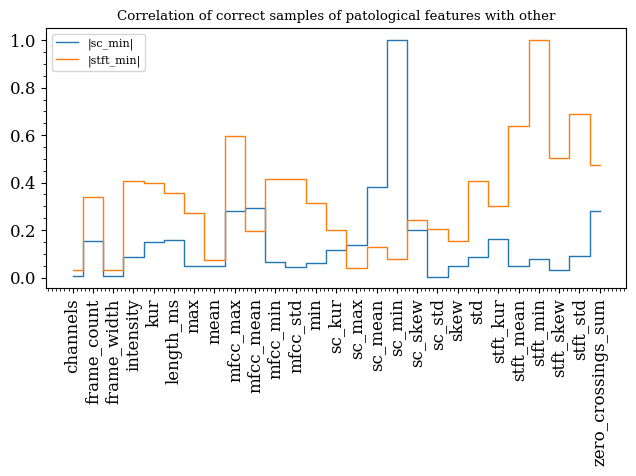

In [187]:
# Exclude patologic samples
filter = (df.sc_min != 0.0)&(df.stft_min!= 0.0) 
correct_samples = np.where(filter)
wrong_samples = np.where(np.logical_not(filter))

# Correlation on the correct samples
correct_corr = df[quantitative_features].iloc[correct_samples].corr(method="spearman")

plt.step(range(len(quantitative_features)), correct_corr["sc_min"].abs(), where="mid", label="|sc_min|")
plt.step(range(len(quantitative_features)), correct_corr["stft_min"].abs(), where="mid", label="|stft_min|")
plt.legend()
plt.xticks(range(len(quantitative_features)), labels=quantitative_features, rotation=90)
plt.title("Correlation of correct samples of patological features with other")
print()


From the above picture it is possible to see that the most correlated features are:
- `sc_min`
    - `sc_mean`
    - `sc_skew`
- `stft_min`
    - `stft_mean`
    - `stft_skew`
    - `stft_std`

so those are the most adequate to perform a regression.
Using a *spearman* correlation, though, a nonlinear scaling maybe necessary to better linearize the problem.

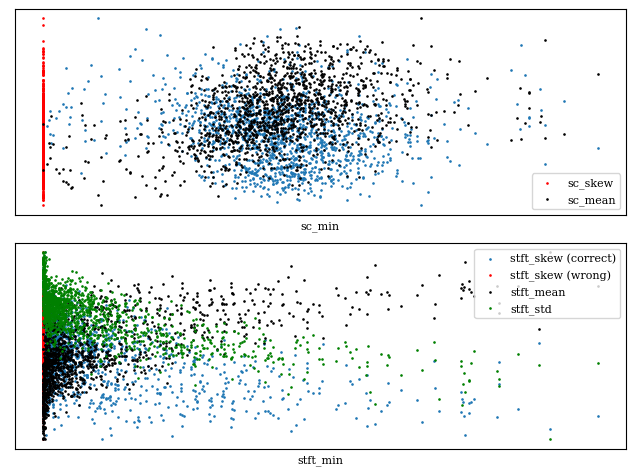

In [188]:
fig, (sc, stft) = plt.subplots(2)
def nmlize(shit):
    return (shit-min(shit))/(max(shit) - min(shit))

sc.scatter( nmlize(df["sc_min"].iloc[correct_samples]), 
            nmlize(df["sc_skew"].iloc[correct_samples]), s=0.8)
sc.scatter(df["sc_min"].iloc[wrong_samples], 
            nmlize(df["sc_skew"].iloc[wrong_samples]), s=0.8, color='r', label="sc_skew")
sc.scatter( nmlize(df["sc_min"].iloc[correct_samples]), 
            nmlize(df["sc_mean"].iloc[correct_samples]), s=0.8, color='k', label="sc_mean")
sc.set_xticks([])
sc.set_yticks([])
sc.set_xlabel("sc_min")
sc.legend()

stft.scatter( nmlize(df["stft_min"].iloc[correct_samples]), 
            nmlize(df["stft_skew"].iloc[correct_samples]), s=0.8, label="stft_skew (correct)")
stft.scatter(df["stft_min"].iloc[wrong_samples], 
            nmlize(df["stft_skew"].iloc[wrong_samples]), s=0.8, color='r', label="stft_skew (wrong)")
stft.scatter( nmlize(df["stft_min"].iloc[correct_samples]), 
            nmlize(df["stft_mean"].iloc[correct_samples]), s=0.8, color='k', label="stft_mean")
stft.scatter( nmlize(df["stft_min"].iloc[correct_samples]), 
            nmlize(df["stft_std"].iloc[correct_samples]), s=0.8, color='g', label="stft_std")
stft.set_xlabel("stft_min")

stft.set_xticks([])
stft.set_yticks([])
stft.legend()


While a log plot for the stft part gives:

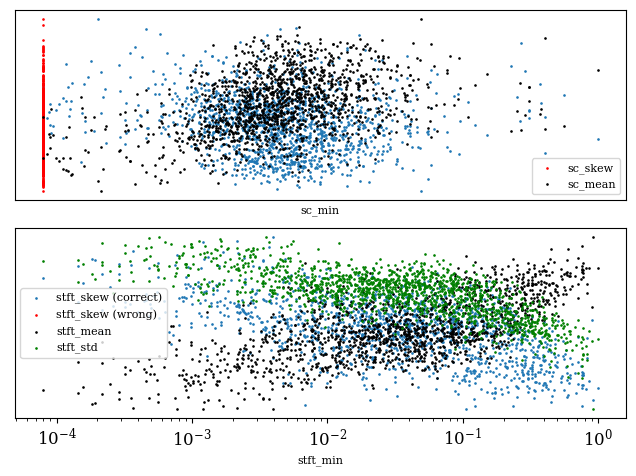

In [189]:
stft.set_xscale("log")
fig

So apparently each `stft`-group feature is somewhat linear in log(`stft_min`)

0
['stft_min'] ['stft_mean']


ValueError: Must have equal len keys and value when setting with an iterable

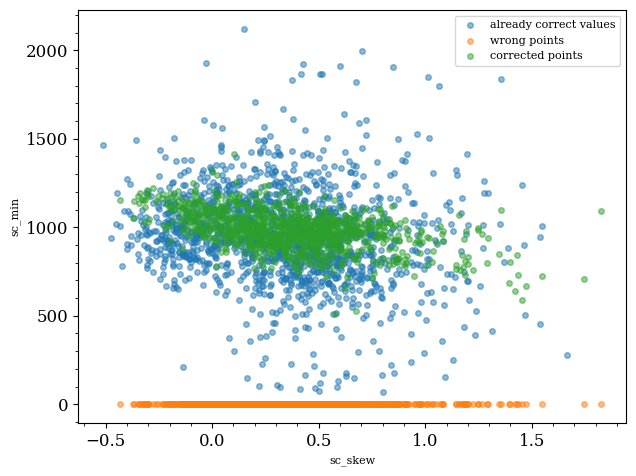

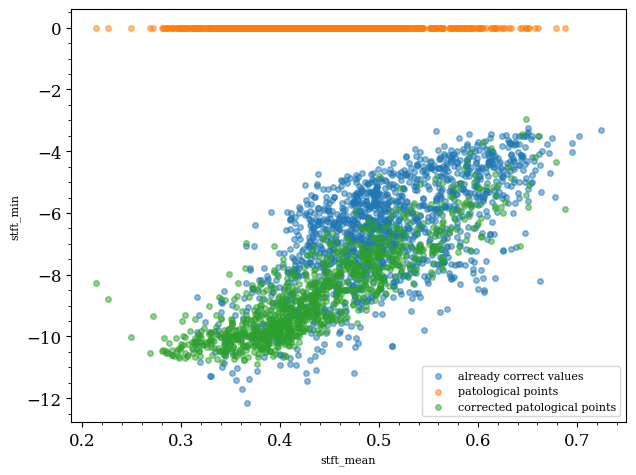

In [41]:
from sklearn.linear_model import LinearRegression

# Selects the patological samples
patological = (df.sc_min == 0.0) & (df.stft_min==0.0)
correct = np.logical_not(patological)

# Multivariate linear regression is executed over ALL the good parameters
# and predicts both the patological features
X=df[["sc_skew","sc_mean", "stft_mean", "stft_skew", "stft_std", "mfcc_mean"]].values
Y=df[["sc_min", "stft_min"]].values

# Transforms the correct values of stft_min in logarithmic scale
# Because the model works better in log scale (exponentially distributed data are not
# well fitted with a linear model)

Y[correct,1] = np.log(Y[correct,1])

model=LinearRegression()


model.fit(X[correct],Y[correct])

plt.scatter(X[correct][:,0],Y[correct][:, 0], alpha=0.5, label = "already correct values")
plt.scatter(X[patological][:,0],Y[patological][:,0],alpha=0.5,label="wrong points")

# Now estimates the patological samples 
Y_estimated=model.predict(X[patological])
plt.scatter(X[patological][:,0],Y_estimated[:,0],alpha=0.5,label= "corrected points")

plt.xlabel("sc_skew")
plt.ylabel("sc_min")
plt.legend()
plt.figure(2)
plt.scatter(X[correct][:,2],Y[correct][:, 1], alpha=0.5, label = "already correct values")
plt.scatter(X[patological][:,2],Y[patological][:,1],alpha=0.5, label= "patological points")
plt.scatter(X[patological][:,2],Y_estimated[:,1],alpha=0.5, label= "corrected patological points")
plt.xlabel("stft_mean")
plt.ylabel("stft_min")
plt.legend()

corrected_dataset = df.copy()

corrected_dataset.loc[patological]=Y_estimated[:,0]
corrected_dataset.stft_min[patological]=Y_estimated[:,1]



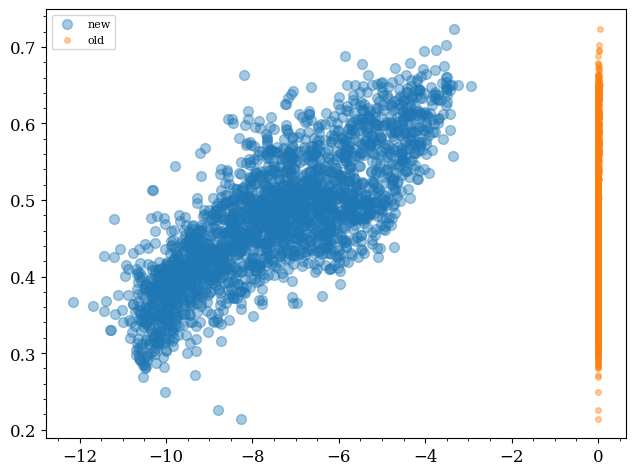

In [191]:
plt.scatter(corrected_dataset.stft_min ,corrected_dataset.stft_mean , alpha=0.4, s = 50, label ="new")
plt.scatter(df.stft_min, df.stft_mean, alpha=0.4, label="old")
plt.legend()

Check for the distributions

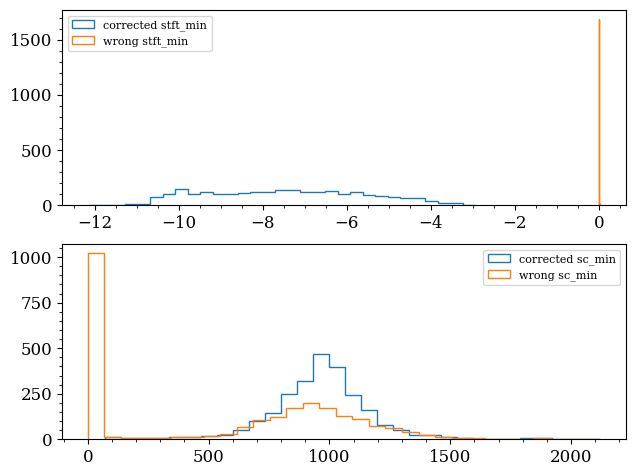

In [192]:
fig, ax = plt.subplots(2)
shit = {"histtype":"step", "bins":31}
ax[0].hist(corrected_dataset.stft_min, **shit, label ="corrected stft_min")
ax[0].hist(df.stft_min, **shit, label="wrong stft_min")
ax[1].hist(corrected_dataset.sc_min,**shit, label="corrected sc_min")
ax[1].hist(df.sc_min, **shit, label="wrong sc_min" )
ax[0].legend()
ax[1].legend()

print()

Now we copy the corrected dataset back into df

In [193]:
df = corrected_dataset

### Correlations

Categorical features cannot be correlated using Spearman correlation, so it is necessary to split `cat/quant`.

- Spearman correlation for numeric data
- [Cramer's V](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V) for categorical data

A _label encoding_ is necessary to perform Cramer's V.

Finally, a cross corrrelation has to be chosen (TODO)

#### Categorical

In [194]:
# Categorical encoding
df_encoded = pd.DataFrame()
for feature in categorical_features:
    # Note: NaN values are converted to -1
    df_encoded[feature] = pd.Categorical(df[feature]).codes

df_encoded.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex
0,1,3,0,0,1,1,0
1,1,0,0,0,0,15,0
2,-1,4,1,0,1,15,0
3,-1,7,0,1,0,13,0
4,0,4,1,0,1,1,0


/home/djanloo/.local/share/virtualenvs/dynamiting-oYIjB6ZE/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


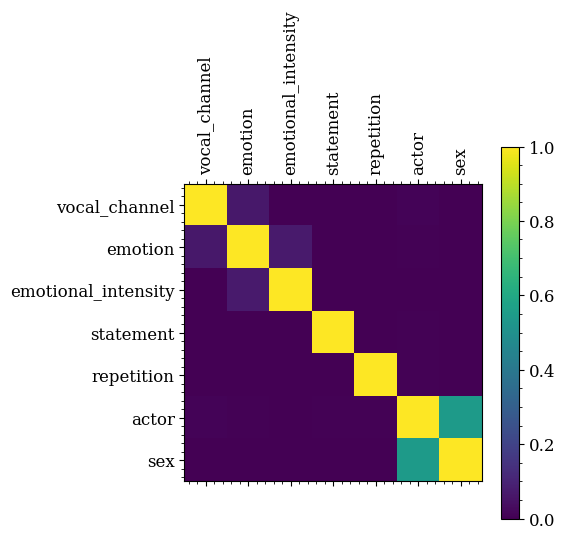

In [195]:
from scipy.stats import chi2_contingency

# Implement Cramer's V
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

V = np.zeros((len(df_encoded.columns), len(df_encoded.columns)))

for i,row in enumerate(df_encoded.columns):
  for j,col in enumerate(df_encoded.columns):
    V[i,j] =  cramers_V(df_encoded[row], df_encoded[col])
plt.matshow(V)
plt.xticks(range(len(df_encoded.columns)),labels=df_encoded.columns, rotation=90,)
plt.yticks(range(len(df_encoded.columns)),labels=df_encoded.columns)
plt.colorbar()


The only features that appear to be "V-correlated" are the sex and actor feature, that is intuitively correct.
The not complete correation is probably due to the missing values in the actor feature.

#### Numerical

/home/djanloo/.local/share/virtualenvs/dynamiting-oYIjB6ZE/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


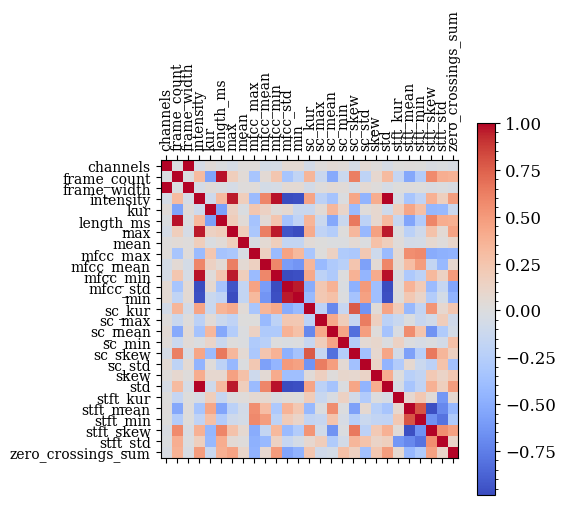

In [196]:
def corr_show(features):
    corr = df[features].corr(method="spearman").values
    plt.matshow(corr, cmap="coolwarm")
    plt.xticks(range(len(features)), labels=features, 
                rotation=90, font={"size":10, "family":"serif"} )
    plt.yticks(range(len(features)), labels=features, 
                rotation=0, font={"size":10, "family":"serif"} )
    plt.minorticks_off()
    plt.colorbar()
corr_show(quantitative_features)
print()

The numerical features correlation matrix shows considerable positive correlations between this couples:

- `frame_count` - `lenght_ms` : due to the sampling rate that is equal for all samples
- `channels` - `frame_width`: by definition of frame width
- `intensity` - `mfcc_min` - `std` - `max`
- `min` - `mfcc_std`

Since `channels` and `frame_width` are correlated only between themselves they are removed from the inference.

/home/djanloo/.local/share/virtualenvs/dynamiting-oYIjB6ZE/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


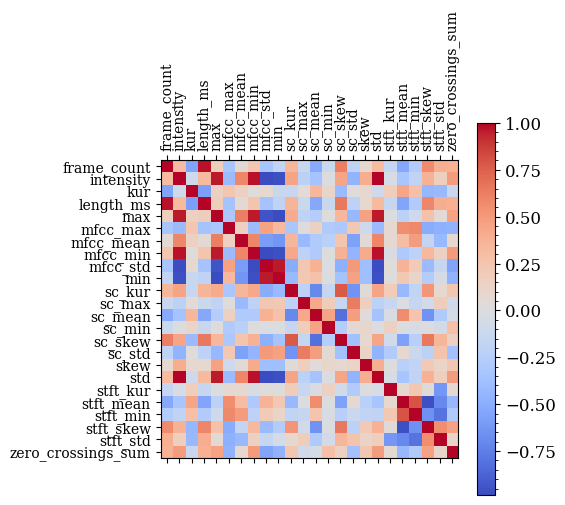

In [197]:
quantitative_features = list(set(quantitative_features) - set(["frame_width", "channels", "mean"]))
quantitative_features.sort()
corr_show(quantitative_features)

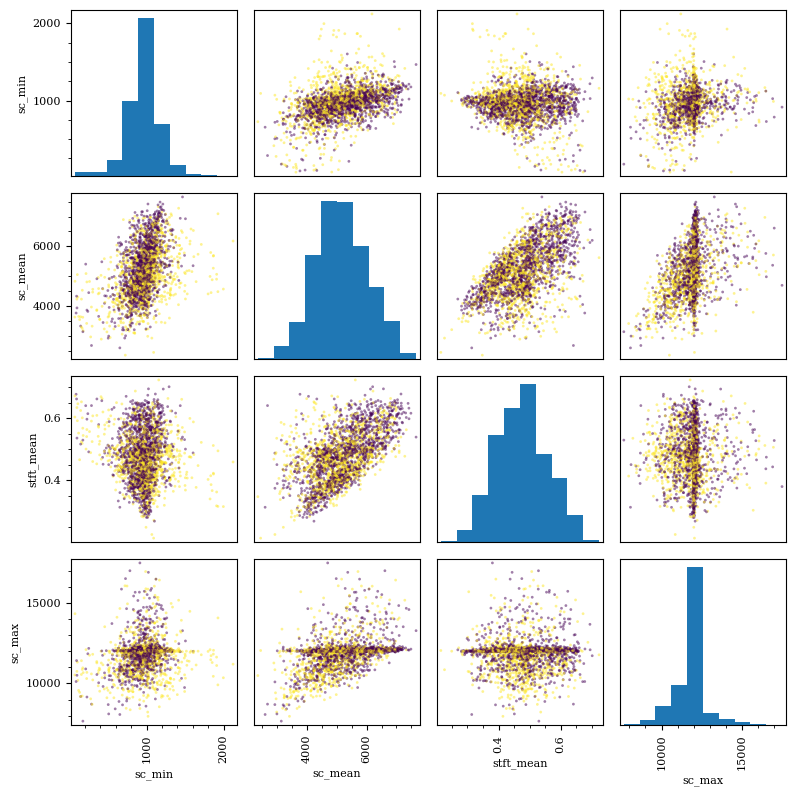

In [198]:
colors = pd.Categorical(corrected_dataset.emotional_intensity).codes
pd.plotting.scatter_matrix(corrected_dataset[[ "sc_min", "sc_mean", "stft_mean", "sc_max"]], c=colors, figsize=(8,8))
plt.show()

### Saving the clean dataset

Better to fill remaining Nan values to `not available` (`N/A`)

In [199]:
clean_categorical = df[categorical_features].fillna(value="GNAA")
clean_quantitative = df[quantitative_features].drop(columns=["frame_count", "length_ms", "std"])
display(clean_categorical)
display(clean_quantitative)

,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex
0,speech,fearful,normal,Dogs are sitting by the door,2nd,2.0,F
1,speech,angry,normal,Dogs are sitting by the door,1st,16.0,F
2,GNAA,happy,strong,Dogs are sitting by the door,2nd,16.0,F
3,GNAA,surprised,normal,Kids are talking by the door,1st,14.0,F
4,song,happy,strong,Dogs are sitting by the door,2nd,2.0,F
...,...,...,...,...,...,...,...
2447,speech,calm,strong,Kids are talking by the door,1st,23.0,M
2448,speech,calm,normal,Dogs are sitting by the door,1st,23.0,M
2449,song,sad,strong,Dogs are sitting by the door,2nd,23.0,M
2450,speech,surprised,normal,Kids are talking by the door,1st,GNAA,M


,intensity,kur,max,mfcc_max,mfcc_mean,mfcc_min,mfcc_std,min,sc_kur,sc_max,sc_mean,sc_min,sc_skew,sc_std,skew,stft_kur,stft_mean,stft_min,stft_skew,stft_std,zero_crossings_sum
0,-36.793432,2.034479,-2.007848,171.69092,-33.485947,-755.22345,134.654860,-0.139057,-0.393328,13541.959028,5792.550744,1194.827959,0.250940,3328.055457,0.273153,-0.788386,0.415250,-8.085133,0.403514,0.335533,16995
1,-33.800066,2.879558,-1.353276,205.00770,-29.502108,-713.98560,130.485630,-0.366603,-1.330400,12000.290443,5197.620555,994.981367,0.219582,4040.931570,0.292157,-1.253763,0.417488,-9.182938,0.290905,0.352380,13906
2,-32.290737,1.138937,-1.822123,165.45653,-30.532463,-726.06036,126.577110,-0.149280,-0.407332,12007.751173,4830.743037,1009.777035,0.436699,3332.131300,0.302659,-0.851776,0.379758,-9.448613,0.470350,0.352270,18723
3,-49.019839,2.423250,-3.942009,190.03609,-36.059555,-842.94635,159.725160,-0.028980,-1.211296,12048.223893,5376.446478,978.090543,0.098802,4053.663073,-0.081014,-1.494839,0.407277,-9.971519,0.274756,0.360552,11617
4,-31.214503,1.745247,-1.435457,161.13400,-31.405996,-700.70276,122.125824,-0.214877,-0.465164,12025.582707,5146.012474,1024.730050,0.496066,3442.724109,0.414872,-1.194482,0.415974,-8.825194,0.318926,0.350655,15137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,-45.580781,2.053299,-3.042206,208.18497,-30.225578,-855.92420,158.845500,-0.041912,-1.576413,12210.517144,5886.647366,971.151287,0.184390,4114.260257,0.759247,-0.521355,0.573838,-5.991620,-0.310088,0.304496,9871
2448,-43.342901,3.033038,-2.533556,220.79490,-31.160332,-825.37410,157.499700,-0.067603,-1.709290,12064.561791,6602.742127,1054.759893,-0.113920,4191.727090,1.073633,-0.440783,0.591010,-6.110498,-0.408018,0.306333,8963
2449,-36.258689,1.165188,-2.379571,235.53938,-26.135280,-768.36536,138.133210,-0.099013,-0.780543,12207.179884,4654.156076,862.218787,0.619346,4231.511986,-0.005821,-1.630589,0.467994,-7.721365,0.130310,0.347843,9765
2450,-45.751265,2.493023,-3.050553,219.84350,-28.242815,-868.09576,159.943400,-0.060543,-1.108718,11981.912464,5524.736973,760.822547,0.206481,3596.031841,-0.110966,-0.935255,0.578854,-6.459900,-0.242668,0.308684,9716


In [200]:
# Local
clean_quantitative.to_csv("ravdess_quantitative.csv", index=False)
clean_categorical.to_csv("ravdess_categorical.csv", index=False)

# Next part's folder
clean_quantitative.to_csv("../CLUSTERING/ravdess_quantitative.csv", index=False)
clean_categorical.to_csv("../CLUSTERING/ravdess_categorical.csv", index=False)

bubba bubba